In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
data= pd.read_csv('mnist_784_csv.csv')
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [4]:
#sepearate fetsures and target variables
x= data.iloc[:,1:].values
y= data.iloc[:,0].values
#split data into training and testing
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [5]:
#normalize 
x_train= x_train.astype('float32')/255.0
x_test= x_test.astype('float32')/255.0

In [6]:
#reshape
x_train= x_train.reshape((x_train.shape[0],28*28))
x_test= x_test.reshape((x_test.shape[0],28*28))

In [7]:
#one-hot encode
#One-hot encoding transforms these integer labels into a binary matrix representation.
# Update with the actual number of classes in your dataset
num_classes=10
y_train= to_categorical(y_train, num_classes=num_classes)
y_test= to_categorical(y_test,  num_classes=num_classes)

In [8]:
model= models.Sequential()
#Input Layer
model.add(layers.InputLayer(shape=(28*28,)))
#hiddenlayer
model.add(layers.Dense(128,activation='relu'))
#hidden layer 2
model.add(layers.Dense(64,activation='relu'))
#output layer
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9924 - loss: 0.0438 - val_accuracy: 1.0000 - val_loss: 3.5298e-06
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 2.5682e-06 - val_accuracy: 1.0000 - val_loss: 7.2568e-07
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 1.0000 - loss: 4.8442e-07 - val_accuracy: 1.0000 - val_loss: 2.3802e-07
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 2.2740e-07 - val_accuracy: 1.0000 - val_loss: 9.9233e-08
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 6.2523e-08 - val_accuracy: 1.0000 - val_loss: 4.2211e-08
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 2.2692e-08 - val_accuracy: 1.0000 - val_loss: 1.9605e-08
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 9.9149e-09 - val_accuracy: 1.0000 - val_loss: 9.7069e-09
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━

In [10]:
test_loss,test_acc= model.evaluate(x_test,y_test)
print(test_acc)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 4.6242e-10
1.0


In [11]:
# Make predictions on test data
predictions = model.predict(x_test)
# Convert prediction probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
# Convert one-hot encoded test labels back to class labels
true_classes = np.argmax(y_test, axis=1)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


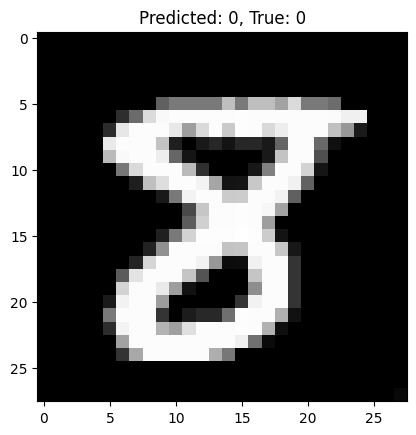

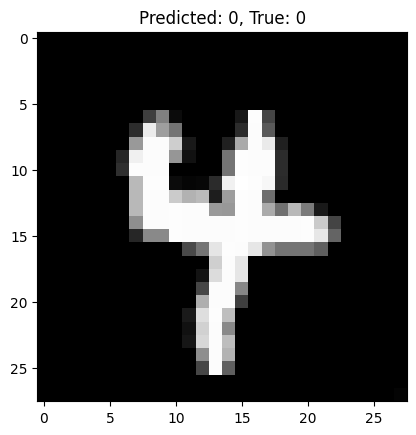

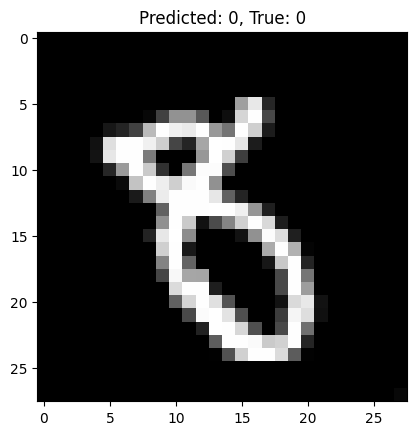

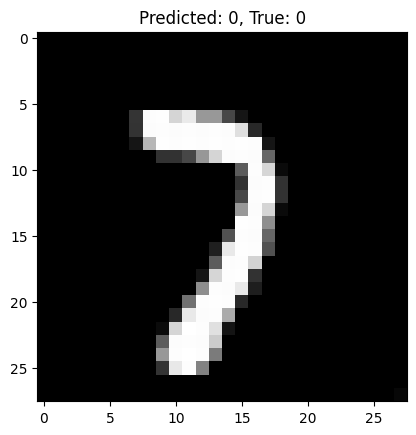

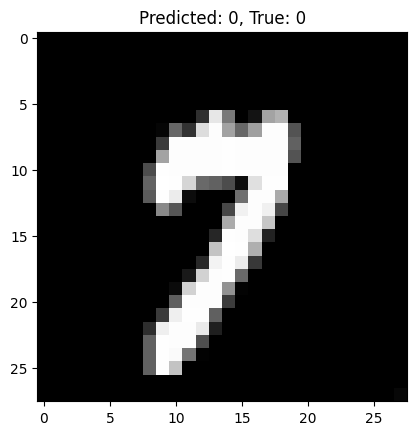

In [14]:
import matplotlib.pyplot as plt

# Function to display images and predictions
def plot_predictions(index):
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[index]}, True: {true_classes[index]}")
    plt.show()

# Show predictions for first 5 images
for i in range(5):
    plot_predictions(i)